In [23]:
import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

pvmodule_df=pd.read_excel("PV_Module_List_Full_Data.xlsx",skiprows=3,sheetname="PV Modules-Full")
pvmodule_df.head()


,Manufacturer,Model Number,Description,BIPV,Nameplate Pmax,PTC,Notes,Nameplate Vpmax,Nameplate Ipmax,Nameplate Voc,...,I_L_ref,R_s_ref,R_sh_ref,delta,I_sc_adj,Time,Version,Mounting,Last Update,CEC Listing Date
0,A10Green Technology,A10J-S72-175,175W Monocrystalline Module,N,175.0,151.2,NaN,36.63,4.78,43.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rack,NaN,NaN
1,A10Green Technology,A10J-S72-180,180W Monocrystalline Module,N,180.0,155.7,NaN,36.72,4.90,44.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rack,NaN,NaN
2,A10Green Technology,A10J-S72-185,185W Monocrystalline Module,N,185.0,160.2,NaN,36.72,5.03,44.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rack,NaN,NaN
3,A10Green Technology,A10J-M60-220,220W Polycrystalline Module,N,220.0,189.1,NaN,30.12,7.30,36.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rack,NaN,NaN
4,A10Green Technology,A10J-M60-225,225W Polycrystalline Module,N,225.0,193.5,NaN,30.24,7.44,36.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rack,NaN,NaN


In [24]:
pvmodule_df.columns

Index([u'Manufacturer', u'Model Number', u'Description', u'BIPV',
       u'Nameplate Pmax', u'PTC', u'Notes', u'Nameplate Vpmax',
       u'Nameplate Ipmax', u'Nameplate Voc', u'Nameplate Isc', u'Average NOCT',
       u'βVoc', u'βVpmax', u'αIsc', u'αIpmax', u'γPmax', u'VPmax, low',
       u'IPmax, low', u'VPmax, NOCT', u'IPmax, NOCT', u'Short Side',
       u'Long Side', u'Geometric Multiplier', u'A_c', u'N_s', u'N_p', u'Type',
       u'Family', u'Technology', u'P2/Pref', u'% nonlin', u'a_ref', u'I_o_ref',
       u'I_L_ref', u'R_s_ref', u'R_sh_ref', u'delta', u'I_sc_adj', u'Time',
       u'Version', u'Mounting', u'Last Update', u'CEC Listing Date'],
      dtype='object')

In [25]:
#get all column names
columns=list(pvmodule_df.columns.values)
print columns

[u'Manufacturer', u'Model Number', u'Description', u'BIPV', u'Nameplate Pmax', u'PTC', u'Notes', u'Nameplate Vpmax', u'Nameplate Ipmax', u'Nameplate Voc', u'Nameplate Isc', u'Average NOCT', u'\u03b2Voc', u'\u03b2Vpmax', u'\u03b1Isc', u'\u03b1Ipmax', u'\u03b3Pmax', u'VPmax, low', u'IPmax, low', u'VPmax, NOCT', u'IPmax, NOCT', u'Short Side', u'Long Side', u'Geometric Multiplier', u'A_c', u'N_s', u'N_p', u'Type', u'Family', u'Technology', u'P2/Pref', u'% nonlin', u'a_ref', u'I_o_ref', u'I_L_ref', u'R_s_ref', u'R_sh_ref', u'delta', u'I_sc_adj', u'Time', u'Version', u'Mounting', u'Last Update', u'CEC Listing Date']


In [26]:
pvmodule_df.dropna(axis=1,inplace=True,how='all')
pvmodule_df.head()

,Manufacturer,Model Number,Description,BIPV,Nameplate Pmax,PTC,Notes,Nameplate Vpmax,Nameplate Ipmax,Nameplate Voc,...,A_c,N_s,N_p,Type,Family,Technology,P2/Pref,Mounting,Last Update,CEC Listing Date
0,A10Green Technology,A10J-S72-175,175W Monocrystalline Module,N,175.0,151.2,NaN,36.63,4.78,43.99,...,1.30020,72,1,Flat Plate,Monocrystalline,Mono-c-Si,0.198167,Rack,NaN,NaN
1,A10Green Technology,A10J-S72-180,180W Monocrystalline Module,N,180.0,155.7,NaN,36.72,4.90,44.06,...,1.30020,72,1,Flat Plate,Monocrystalline,Mono-c-Si,0.197985,Rack,NaN,NaN
2,A10Green Technology,A10J-S72-185,185W Monocrystalline Module,N,185.0,160.2,NaN,36.72,5.03,44.14,...,1.30020,72,1,Flat Plate,Monocrystalline,Mono-c-Si,0.197744,Rack,NaN,NaN
3,A10Green Technology,A10J-M60-220,220W Polycrystalline Module,N,220.0,189.1,NaN,30.12,7.30,36.06,...,1.62384,60,1,Flat Plate,Polycrystalline,Multi-c-Si,0.189289,Rack,NaN,NaN
4,A10Green Technology,A10J-M60-225,225W Polycrystalline Module,N,225.0,193.5,NaN,30.24,7.44,36.24,...,1.62384,60,1,Flat Plate,Polycrystalline,Multi-c-Si,0.189384,Rack,NaN,NaN


In [27]:
def null_data(column):
        return column.isnull().sum()
pvmodule_df.apply(null_data)

Manufacturer                0
Model Number                0
Description                 0
BIPV                        0
Nameplate Pmax              0
PTC                         0
Notes                   20017
Nameplate Vpmax             0
Nameplate Ipmax             0
Nameplate Voc               0
Nameplate Isc               0
Average NOCT                0
βVoc                        0
βVpmax                      0
αIsc                        0
αIpmax                      0
γPmax                       0
VPmax, low                  0
IPmax, low                  0
VPmax, NOCT                 0
IPmax, NOCT                 0
Short Side                  0
Long Side                   0
Geometric Multiplier        0
A_c                         0
N_s                         0
N_p                         0
Type                        0
Family                      0
Technology                  0
P2/Pref                     0
Mounting                  146
Last Update             20391
CEC Listin

In [28]:
# List of questions:
# 1. Which manufacturer has highest fill factor?
# 2. Differences between mono and multi in performance? Which one more widelyspread?
# 3. Average operation temperature? 
# 4. Plot different manufacturers type of solar cell
# 5. Who is the top manufacturer in CA?
# 6. Which manufacturer/technology has the best coefficient? http://sinovoltaics.com/solar-basics/measuring-the-temperature-coefficients-of-a-pv-module/
# 7. Dominating type? dominating mounting? distribution of area of solar modules?
# 8. P2/Pref?
# 9 Power per day (at Nominal Operating Cell Temperature) assume 12 hours of operation
# 10 is there a specific kind of solar module that has higher NOCT? >45C maybe which is typical

In [29]:
#1. Calculating Fill Factor 
pvmodule_df['Fill Factor']=pvmodule_df['PTC']/(pvmodule_df['Nameplate Voc']*pvmodule_df['Nameplate Isc'])
pvmodule_ff_df=pvmodule_df.drop(["BIPV","Notes","Short Side","Long Side","Geometric Multiplier", "Family"
                                 ,"Last Update","N_s","N_p","A_c","CEC Listing Date","Mounting"],axis=1)
pvmodule_ff_df.columns
pvmodule_ff_df.sort_values('Fill Factor',ascending=0)

,Manufacturer,Model Number,Description,Nameplate Pmax,PTC,Nameplate Vpmax,Nameplate Ipmax,Nameplate Voc,Nameplate Isc,Average NOCT,...,αIpmax,γPmax,"VPmax, low","IPmax, low","VPmax, NOCT","IPmax, NOCT",Type,Technology,P2/Pref,Fill Factor
14493,Silfab,SSG365M,365W Monocrystalline Module Smart Jbox,365.0,325.0,39.50,9.26,40.40,9.71,47.30,...,0.018401,-0.496800,38.120000,1.860000,35.390000,9.230000,Flat Plate,Mono-c-Si,0.194255,0.828481
14477,Silfab,SSA310M,310W Monocrystalline Module Smart Jbox,310.0,279.7,33.05,9.38,34.20,9.93,44.80,...,-0.009410,-0.501110,32.430000,1.860000,29.880000,9.240000,Flat Plate,Mono-c-Si,0.194580,0.823601
14495,Silfab,SSG370M,370W Monocrystalline Module Smart Jbox,370.0,329.6,37.90,9.36,40.40,9.93,47.30,...,0.018401,-0.496800,36.570000,1.880000,33.960000,9.330000,Flat Plate,Mono-c-Si,0.185815,0.821593
14475,Silfab,SSA305M,305W Monocrystalline Module Smart Jbox,305.0,275.0,32.92,9.27,34.20,9.82,44.80,...,-0.009410,-0.501110,32.300000,1.840000,29.760000,9.130000,Flat Plate,Mono-c-Si,0.194859,0.818833
14491,Silfab,SSG360M,360W Monocrystalline Module,360.0,320.4,39.30,9.20,40.40,9.71,47.33,...,0.018401,-0.496800,37.924751,1.849251,35.214406,9.169162,Flat Plate,Mono-c-Si,0.194812,0.816755
5863,Hanwha Q CELLS,Q.PEAK G4.1/ Max 305,305W Monocrystalline Module,305.0,279.3,32.62,9.35,35.00,9.84,45.84,...,-0.010000,-0.408000,31.931772,1.837514,29.664666,7.522638,Flat Plate,Multi-c-Si,0.192377,0.810976
14473,Silfab,SSA300M,300W Monocrystalline Module,300.0,270.4,32.90,9.26,34.20,9.76,44.83,...,-0.009410,-0.501110,32.283510,1.833643,29.745628,9.117225,Flat Plate,Mono-c-Si,0.197321,0.810085
14489,Silfab,SSG355M,355W Monocrystalline Module,355.0,315.7,39.10,9.16,40.40,9.65,47.33,...,0.018401,-0.496800,37.731750,1.841211,35.035198,9.129296,Flat Plate,Mono-c-Si,0.195696,0.809778
14471,Silfab,SSA295M,295W Monocrystalline Module,295.0,265.7,32.70,9.04,34.20,9.61,44.83,...,-0.009410,-0.501110,32.087258,1.790079,29.564803,8.900617,Flat Plate,Mono-c-Si,0.194708,0.808429
5858,Hanwha Q CELLS,Q.PEAK G4.1/ Max 300,300W Monocrystalline Module,300.0,274.6,32.41,9.26,35.00,9.77,45.84,...,-0.010000,-0.408000,31.726202,1.819826,29.473692,7.450228,Flat Plate,Multi-c-Si,0.192454,0.803041


In [30]:
pvmodule_ff_df.sort_values('Nameplate Pmax',ascending=0)
pvmodule_ff_df['Power Operating Ratio']=pvmodule_ff_df['PTC']/pvmodule_ff_df['Nameplate Pmax']
pvmodule_ff_df.sort_values('Power Operating Ratio',ascending=0)

,Manufacturer,Model Number,Description,Nameplate Pmax,PTC,Nameplate Vpmax,Nameplate Ipmax,Nameplate Voc,Nameplate Isc,Average NOCT,...,γPmax,"VPmax, low","IPmax, low","VPmax, NOCT","IPmax, NOCT",Type,Technology,P2/Pref,Fill Factor,Power Operating Ratio
4544,First Solar,FS-272,72.5W Thin Film CdTe Module,72.5,69.8,67.90,1.07,90.00,1.19,44.9,...,-0.165500,66.750776,0.210000,64.739633,0.860000,Flat Plate,Thin Film,0.193347,0.651727,0.962759
4546,First Solar,FS-275,75W Thin Film CdTe Module,75.0,72.2,69.40,1.08,92.00,1.20,44.9,...,-0.165500,68.225388,0.211963,66.169817,0.868037,Flat Plate,Thin Film,0.192816,0.653986,0.962667
4549,First Solar,FS-277,77.5W Thin Film CdTe Module,77.5,74.6,70.90,1.09,93.00,1.21,44.9,...,-0.165500,69.700000,0.213925,67.600000,0.876075,Flat Plate,Thin Film,0.192395,0.662934,0.962581
4550,First Solar,FS-280,80W CdTe Thin Film Module,80.0,76.9,71.20,1.12,91.50,1.22,45.9,...,-0.167233,69.994922,0.219813,67.886037,0.900187,Flat Plate,Thin Film,0.192322,0.688883,0.961250
4542,First Solar,FS-270,70W Thin Film CdTe Module,70.0,67.2,67.90,1.07,89.00,1.19,45.9,...,-0.167233,68.105136,0.222475,64.720393,0.858119,Flat Plate,Thin Film,0.216453,0.634501,0.960000
4540,First Solar,FS-267,67.5W Thin Film CdTe Module,67.5,64.8,64.20,1.05,87.00,1.18,45.9,...,-0.167233,64.393958,0.218317,61.193656,0.842079,Flat Plate,Thin Film,0.208271,0.631210,0.960000
4564,First Solar,FS-395,95.0W Thin Film CdTe Module,95.0,90.9,47.50,2.00,60.50,2.17,46.0,...,-0.190000,47.794015,0.400426,45.055588,1.656017,Flat Plate,Thin Film,0.201452,0.692387,0.956842
4560,First Solar,FS-392,92.5W Thin Film CdTe Module,92.5,88.5,49.50,1.87,61.00,2.06,46.0,...,-0.190000,49.806394,0.374398,46.952665,1.548376,Flat Plate,Thin Film,0.201594,0.704281,0.956757
11490,NexPower Technology,NH-100UX 5A,105W Thin Film a-Si Module,105.0,100.3,77.20,1.36,102.00,1.68,46.0,...,-0.181000,66.446099,0.290000,61.290636,1.315410,Flat Plate,Thin Film,0.183518,0.585317,0.955238
3989,EPV SOLAR,EPV-40,"40W Thin Film Dual Junction a-Si Module, Frame...",40.0,38.2,44.00,0.92,59.90,1.17,41.8,...,-0.215000,38.016736,0.189412,38.108787,0.660235,Flat Plate,Thin Film,0.180020,0.545068,0.955000


In [31]:
pvmodule_ff_df.groupby("Technology")['P2/Pref'].describe()
#Most cells are Multi-c-Si with efficiency on par with Mono-c-Si (surprising), P2/Pref above 1? Need to fix!


Technology       
Mono-c-Si   count     8757.000000
            mean         0.196088
            std          0.015779
            min          0.060467
            25%          0.191017
            50%          0.195627
            75%          0.200739
            max          0.340912
Multi-c-Si  count    10952.000000
            mean         0.196621
            std          0.018103
            min          0.064119
            25%          0.190681
            50%          0.195045
            75%          0.199984
            max          0.697724
Thin Film   count      693.000000
            mean         0.188230
            std          0.103199
            min          0.061774
            25%          0.175364
            50%          0.184924
            75%          0.193864
            max          1.501054
Name: P2/Pref, dtype: float64

In [44]:
def find_efficiency_outliers(row):
    if row['P2/Pref']>0.5:
        print row[['Manufacturer','Description','P2/Pref','Fill Factor']]
        
pvmodule_ff_df.apply(find_efficiency_outliers,axis=1)


Manufacturer            Dow Chemical
Description     37W CIGS BIPV Module
P2/Pref                      1.49923
Fill Factor                 0.533802
Name: 3581, dtype: object
Manufacturer            Dow Chemical
Description     39W CIGS BIPV Module
P2/Pref                      1.48997
Fill Factor                 0.547315
Name: 3583, dtype: object
Manufacturer            Dow Chemical
Description     41W CIGS BIPV Module
P2/Pref                       1.4718
Fill Factor                 0.561462
Name: 3585, dtype: object
Manufacturer            Dow Chemical
Description     43W CIGS BIPV Module
P2/Pref                      1.50105
Fill Factor                 0.565467
Name: 3587, dtype: object
Manufacturer                Hansol Technics
Description     260W Polycrystalline Module
P2/Pref                            0.697724
Fill Factor                        0.693684
Name: 5694, dtype: object
Manufacturer                Hansol Technics
Description     265W Polycrystalline Module
P2/Pref       

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
20372    None
20373    None
20374    None
20375    None
20376    None
20377    None
20378    None
20379    None
20380    None
20381    None
20382    None
20383    None
20384    None
20385    None
20386    None
20387    None
20388    None
20389    None
20390    None
20391    None
20392    None
20393    None
20394    None
20395    None
20396    None
20397    None
20398    None
20399    None
20400    None
20401    None
dtype: object

In [47]:
pvmodule_ff_df.groupby('Manufacturer')['P2/Pref'].count().sort_values(ascending=0)

Manufacturer
REC Solar                                     665
Hanwha SolarOne (Qidong)                      643
Trina Solar                                   529
Hanwha Q CELLS (Qidong)                       481
AU Optronics                                  479
Topsun                                        414
MEMC Singapore                                414
Centrosolar America                           404
LG Electronics                                346
Jinko Solar                                   336
Changzhou Trina Solar Energy Co.              318
Upsolar                                       310
Hyundai Heavy Industries Green Energy Co.     269
Canadian Solar                                257
Grape Solar                                   251
SunEdison                                     246
Symphony Energy                               243
Suntech Power                                 243
ET Solar New Energy                           238
Neo Solar Power                      

In [77]:
high_noct_df=pvmodule_ff_df[pvmodule_ff_df["Average NOCT"]>55][['Manufacturer','Description','Average NOCT','Technology']].sort_values('Average NOCT',ascending=0)
count_high_noct_df=high_noct_df.groupby('Technology').count()['Manufacturer']
count_high_noct_df.head()
#Thin Film used more in roofs - BIPV has poor ventilation that cause overheating

Technology
Mono-c-Si     33
Multi-c-Si    30
Thin Film     48
Name: Manufacturer, dtype: int64

AttributeError: 'BarContainer' object has no attribute 'legend'

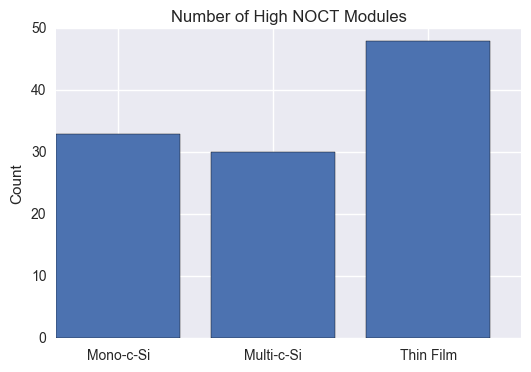

In [113]:
%matplotlib inline
ax=plt.bar(range(0,count_high_noct_df.size),count_high_noct_df.values,width=0.8)
sns.set_style()
plt.ylabel('Count')
plt.title('Number of High NOCT Modules')
plt.xticks(np.arange(0,3)+0.8/2,count_high_noct_df.index)

